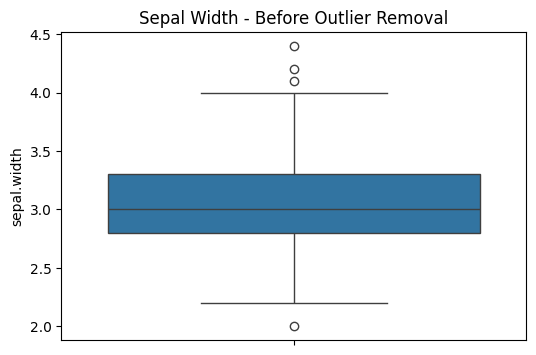

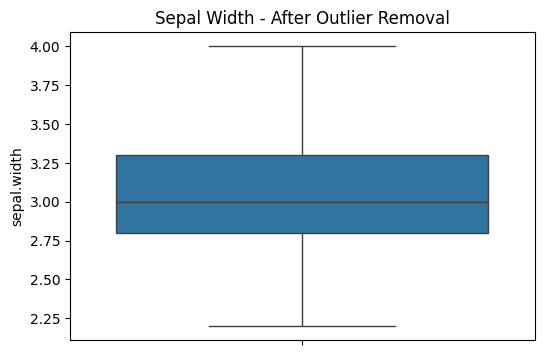

Logistic Regression Accuracy: 0.9333
Naive Bayes Accuracy: 0.9333
Accuracy Difference (LogReg - NaiveBayes): 0.0


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset (headers already present)
df = pd.read_csv('iris.csv')

# Automatically get feature columns (excluding target 'variety')
feature_cols = df.columns[:-1]

# ----- e. Data Cleaning -----
# Replace '?' with NaN and remove rows with NaN or negative values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df[feature_cols] = df[feature_cols].apply(pd.to_numeric, errors='coerce')
df = df[(df[feature_cols] >= 0).all(axis=1)]

# ----- f. Error Correcting (Outlier Removal) -----
# Before-outlier boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df['sepal.width'])
plt.title("Sepal Width - Before Outlier Removal")
plt.show()

# IQR-based outlier removal
for col in feature_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# After-outlier boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df['sepal.width'])
plt.title("Sepal Width - After Outlier Removal")
plt.show()

# ----- g. Data Transformation -----
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# ----- h. Model Building & Accuracy Comparison -----
X = df[feature_cols]
y = df['variety']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
log_acc = accuracy_score(y_test, log_model.predict(X_test))

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_acc = accuracy_score(y_test, nb_model.predict(X_test))

# ----- Results -----
print("Logistic Regression Accuracy:", round(log_acc, 4))
print("Naive Bayes Accuracy:", round(nb_acc, 4))
print("Accuracy Difference (LogReg - NaiveBayes):", round(log_acc - nb_acc, 4))
